<a href="https://colab.research.google.com/github/DongHyun99/Algorithm/blob/master/Support%20Vector%20Machine%20(Kernel).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
import numpy as np
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


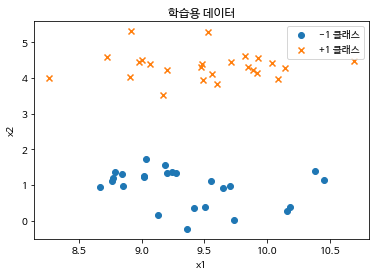

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

In [7]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C=1e10).fit(X,y)
model.n_support_

array([1, 1], dtype=int32)

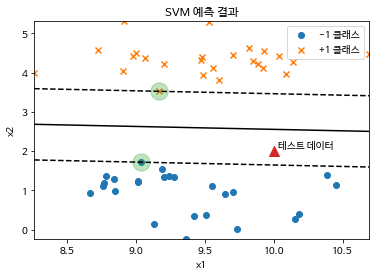

In [14]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy) # n차원 격자 만들기

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1): # i,j에 좌표 반환 val에는 값을 반환
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]]) # 불확실성을 추정하는 함수
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()